A dataset is required in order to train and test a neural network. Some standard datasets are provided as part of Keras (https://keras.io/datasets/) and can be easily loaded. For example, to load the MNIST dataset use the following python code:

In [1]:
from tensorflow.keras.datasets import mnist 
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

The MNIST images are stored in the form of integers with values in the range [0,255]. To convert to floating-point numbers in the range [0,1] use the following python code:

In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

The category labels are in the form of integers 0 to 9. To define the output that the network should produce in response to each sample (a one hot encoding) use the following python code

In [3]:
from tensorflow.keras.utils import to_categorical
# convert class labels into one-hot encoded vectors
# only one element is 1 (indicating the presence of that category) 
# and all other elements are 0
y_train = to_categorical(labels_train,10)
y_test = to_categorical(labels_test,10)

This dataset consists of 70000 28-by-28 pixel images of handwritten digits, which are by convention split into 60000 images for training and 10000 for testing.

If the data is to be used as input to a dense layer, then it should be reshaped into a matrix where each row is a sample, using the following python code:

In [4]:
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)

If the data is to be used as input to a convolutional layer, then it should be reshaped into a fourdimensional matrix where the first dimension corresponds to the number of exemplars, the second and third dimensions correspond to the width and height of each image, and the fourth dimension corresponds to the number of colour channels in each image:

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**Defining a Neural Network**

 The first step in developing a neural network is to define its architecture (the number and types of layers, and their interconnectivity). Keras allows neural networks to be defined in several different ways, two are described below.

**Method 1** 

The first method allows you to define a sequence of layers, it is assumed that the output of one layer provides the input to the next. For example, to build a three layer MLP network called “net” use the following python code:

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
net = Sequential()
net.add(Dense(800, activation='relu', input_shape=(784,))) 
net.add(Dense(400, activation='relu')) 
net.add(Dense(10, activation='softmax'))

Note that when adding a layer to the network, we can define parameters, such as: the number of neurons (in the example above the 1st layer has 800 neurons, the second has 400 neurons, and the 3rd layer has 10 neurons), and the activation function (in the example above the 1st and 2nd layers use RELU, and the 3rd layer uses softmax). Other activation functions are also available (see https://keras.io/activations/). 

There are many different types of layers that can be used (see https://keras.io/layers/). For example, to build a simple CNN using convolutional, maxpooling, as well as dense layers (and with dropout for one layer):

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
net = Sequential()
net.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',input_shape=(28,28,1)))
net.add(MaxPool2D(pool_size=(2, 2))) 
net.add(Conv2D(32, (3, 3), activation='relu')) 
net.add(MaxPool2D(pool_size=(2, 2))) 
net.add(Flatten()) 
net.add(Dense(256, activation='relu')) 
net.add(Dropout(rate=0.5)) 
net.add(Dense(10, activation='softmax'))


Whichever method is used to define a network, a textual description of its structure can be obtained using:

In [8]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 256)              

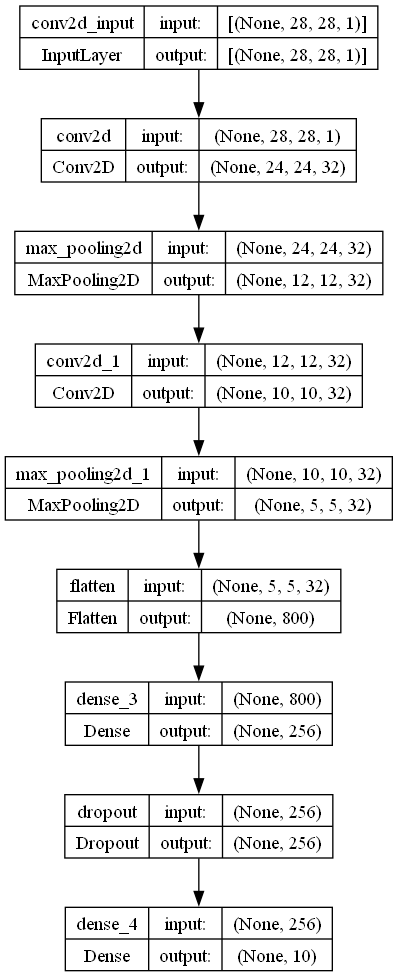

In [10]:
from tensorflow.keras.utils import plot_model
import pydot

plot_model(net, to_file='network_structure.png', show_shapes=True)

In [11]:
net.compile(loss='categorical_crossentropy', optimizer='adam')
history = net.fit(x_train, y_train,
                  validation_data=(x_test, y_test),
                  epochs=20,
                  batch_size=256)

Epoch 1/20
235/235 [==============================] - 8s 33ms/step - loss: 0.3454 - val_loss: 0.0702
Epoch 2/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0889 - val_loss: 0.0441
Epoch 3/20
235/235 [==============================] - 8s 32ms/step - loss: 0.0652 - val_loss: 0.0377
Epoch 4/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0519 - val_loss: 0.0292
Epoch 5/20
235/235 [==============================] - 8s 32ms/step - loss: 0.0428 - val_loss: 0.0279
Epoch 6/20
235/235 [==============================] - 8s 32ms/step - loss: 0.0386 - val_loss: 0.0244
Epoch 7/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0348 - val_loss: 0.0232
Epoch 8/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0296 - val_loss: 0.0231
Epoch 9/20
235/235 [==============================] - 8s 32ms/step - loss: 0.0279 - val_loss: 0.0215
Epoch 10/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0260 - val_lo

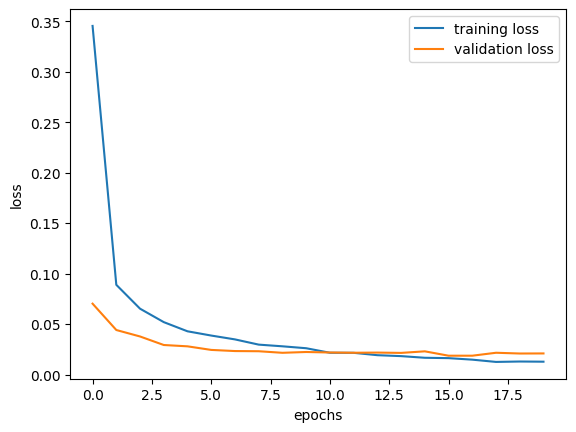

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

313/313 [==============================] - 1s 4ms/step
Percentage correctly classified MNIST=  99.45


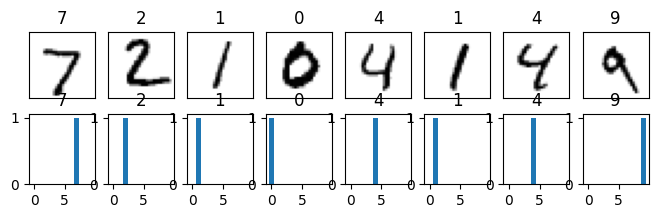

In [21]:
import numpy as np
plt.figure(figsize=(8, 2))
for i in range(0, 8):
    ax = plt.subplot(2, 8, i+1)
    plt.imshow(x_test[i, :].reshape(28, 28), cmap=plt.get_cmap('gray_r'))
    plt.title(labels_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
for i in range(0, 8):
    # output = net.predict(x_test[i, :].reshape(1, 784))  # if MLP
    output = net.predict(x_test[i,:].reshape(1, 28,28,1)) #if CNN
    output = output[0, 0:]
    plt.subplot(2, 8, 8+i+1)
    plt.bar(np.arange(10.), output)
    plt.title(np.argmax(output))
    
outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print('Percentage correctly classified MNIST= ',100*correct_classified/labels_test.size)